In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [25]:
donor = pd.read_csv('donor.csv')
receiver = pd.read_csv('receiver.csv')

In [26]:
donor.head(5)

SNo                      Urn JournalDate PurchaseDate  ExpiryDate  \
0    1  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
1    2  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
2    3  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
3    4  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   
4    5  00001201904120000001166  2019-04-12   2019-04-12  2019-04-26   

             Purchaser Prefix  BondNumber  Denominations  PayBranchCode  \
0  A B C INDIA LIMITED     TL       11448        1000000              1   
1  A B C INDIA LIMITED     TL       11447        1000000              1   
2  A B C INDIA LIMITED     TL       11441        1000000              1   
3  A B C INDIA LIMITED     OL        1113         100000              1   
4  A B C INDIA LIMITED     OL        1118         100000              1   

   PayTeller  
0    5899230  
1    5899230  
2    5899230  
3    5899230  
4    5899230

In [27]:
receiver.head()

Sno DateEncashment                                 PartyName   AccountNum  \
0    1     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
1    2     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
2    3     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
3    4     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   
4    5     2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM  *******5199   

  Prefix  BondNumber  Denominations  PayBranchCode  PayTeller  
0     OC         775       10000000            800    2770121  
1     OC        3975       10000000            800    2770121  
2     OC        3967       10000000            800    2770121  
3     TL       10418        1000000            800    2770121  
4     TL         126        1000000            800    2770121

In [28]:
# Checking if bond numbers correctly match between donors and recipients

df = pd.merge(donor,receiver,on='BondNumber',how='inner')

# Both the files donor,receiver has numerical data.Checking the descrptive statistics for 'donor'
# 'receiver' data

d_desc = donor.describe()
r_desc = receiver.describe()

print(d_desc)
print(r_desc)

                SNo    BondNumber  Denominations  PayBranchCode     PayTeller
count  18871.000000  18871.000000   1.887100e+04   18871.000000  1.887100e+04
mean    9436.000000  12181.003338   6.441372e+06     480.065550  5.895737e+06
std     5447.732801   6573.754865   4.538947e+06     395.446834  1.825395e+06
min        1.000000      8.000000   1.000000e+03       1.000000  1.013030e+06
25%     4718.500000   8317.500000   1.000000e+06       1.000000  5.054982e+06
50%     9436.000000  12350.000000   1.000000e+07     509.000000  6.405134e+06
75%    14153.500000  14764.000000   1.000000e+07     813.000000  7.273126e+06
max    18871.000000  71548.000000   1.000000e+07    1355.000000  8.492239e+06
                Sno    BondNumber  Denominations  PayBranchCode     PayTeller
count  20421.000000  20421.000000   2.042100e+04   20421.000000  2.042100e+04
mean   10211.000000  11783.435140   6.252921e+06     559.467852  5.293055e+06
std     5895.179259   6525.685559   4.576321e+06     297.836567 

#### Matched Bonds Overview
   * The df contains entries where the bond numbers from both donor and recipient data align.
   * A single bond can appear multiple times, indicating multiple entries for a single bond purchase or encashment, possible due to the samee bond recorded in different transactions or time points.
   * The 'Denomination' Column (the value of the bonds) shows a range of amounts, indicating varying levels of donations.
   * There are multiple entries for both purchasers (donors) and political parties (recipients), highlighting the repeated enagement of certain entities in the funding process.

### Descriptive Statistics
   * Donor Data: The denominations range widely, indicating varied donation amounts. The presence of unique bond numbers and varying branch code suggests a nationwide spread of donation activities.
   
   * Receipient Data: Similar to donor data, a wide range of denominations and bond numbers are present. The repetition of certain bond numbers indicates multiple encashments or records for the same bond.

### Trend Analysis of Political Donations and Encashments Over Time

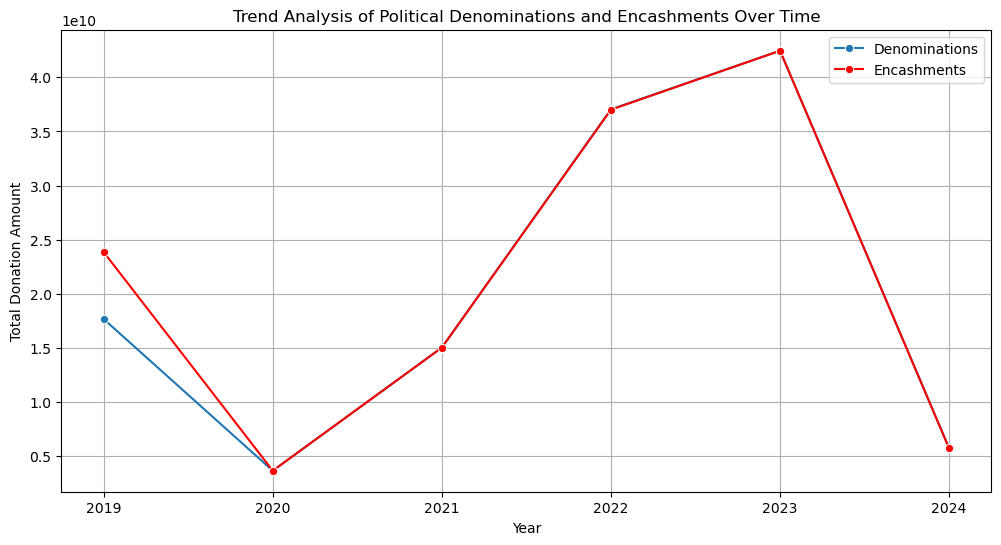

In [29]:
# converting datas to datetime for analysis
donor['PurchaseDate'] = pd.to_datetime(donor['PurchaseDate'])
receiver['DateEncashment'] = pd.to_datetime(receiver['DateEncashment'])

# Trend Analysis overtime for both datasets
# Grouping by year summing the denominations

donor_trends = donor.groupby(by=donor['PurchaseDate'].dt.year)['Denominations'].sum()
receiver_trends = receiver.groupby(by=receiver['DateEncashment'].dt.year)['Denominations'].sum()

# Plotting the Trends

plt.figure(figsize=(12,6))
sns.lineplot(data=donor_trends,marker='o',label='Denominations')
sns.lineplot(data=receiver_trends,marker='o',color='red',label='Encashments')
plt.title('Trend Analysis of Political Denominations and Encashments Over Time')
plt.xlabel('Year')
plt.ylabel('Total Donation Amount')
plt.legend()
plt.grid(True)
plt.show()

### The Trend Analysis of political donations and encashments over time reveals several key points:

1. __Overall Trends__: Both donations (purchases) and encashments display a trend over the years. The trends for donations and encashments are closely aligned, as expected, since encashments should ideally follow donations.

2. __Yearly variaitions__: There are noticeable fluctuations in the total donation amounts each year. These variations could be indicative of political cycles, such as election years or significant political events influencing the flow of donations.
3. __Peak Periods__: Specific years show higher total donation amounts. Identifying these years and correlating them with political events could provide insights into how political developments influence funding.

4. __Consistency__: The Consistency in the trend lines between donations and encashments suggests a steady process of bond puchases and subsequent encashments by political parties.

#### Top 10 Donors and Receivers

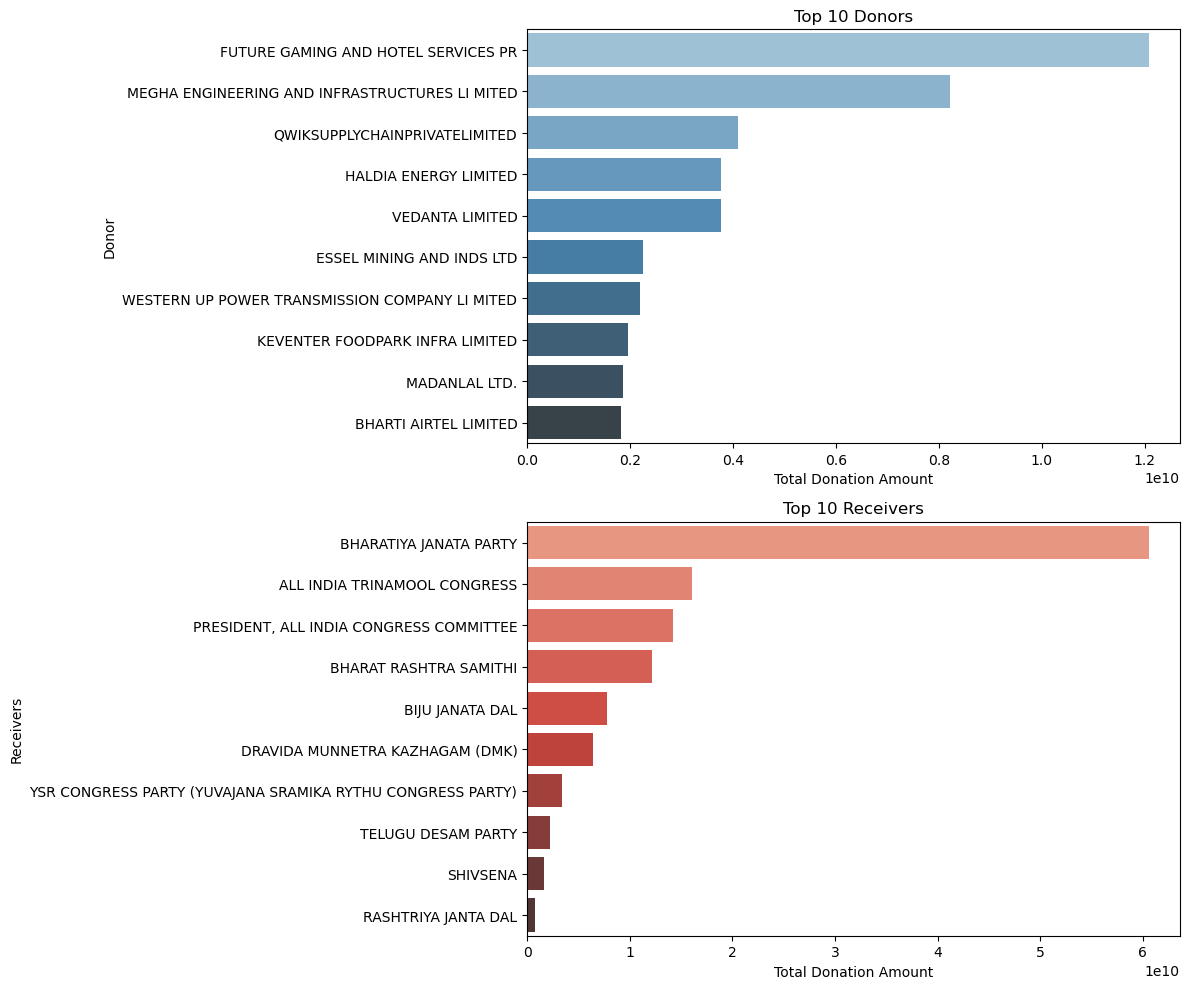

In [31]:
# Identifying top donors

top_donors = donor.groupby(by=donor['Purchaser'])['Denominations'].sum().sort_values(ascending=False).head(10)

# Identifying top receivers

top_receivers = receiver.groupby(by=receiver['PartyName'])['Denominations'].sum().sort_values(ascending=False).head(10)

#plotting top donors and receivers

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.barplot(x=top_donors.values,y=top_donors.index,palette='Blues_d')
plt.title('Top 10 Donors')
plt.xlabel('Total Donation Amount')
plt.ylabel('Donor')

plt.subplot(2,1,2)
sns.barplot(x=top_receivers.values,y=top_receivers.index,palette='Reds_d')
plt.title('Top 10 Receivers')
plt.xlabel('Total Donation Amount')
plt.ylabel('Receivers')

plt.tight_layout()
plt.show()

The Analysis of the top donors and top receivers in dataset provides valuable insights.

#### Top Donors
* The bar chart for the top 10 donors shows a diverse range of entities contributing significant amounts to political funding.
* Some donors stand out with notably higher contributions, indicating their substational role in political financing.
* Understanding the background and intersets of these top donors could shed light on potential influences in the political sphere.

#### Top Receivers
* The chart for the top 10 recipients, typically political parties, highlights those receiving the most funding.
* Similar to donors, there's variation in the total amounts received, with certain parties dominating the funding landscape.
* This distribution can provide insights into the relative financial backing of different political entities.

#### Distribution of Donation Sizes - Donors/Receivers

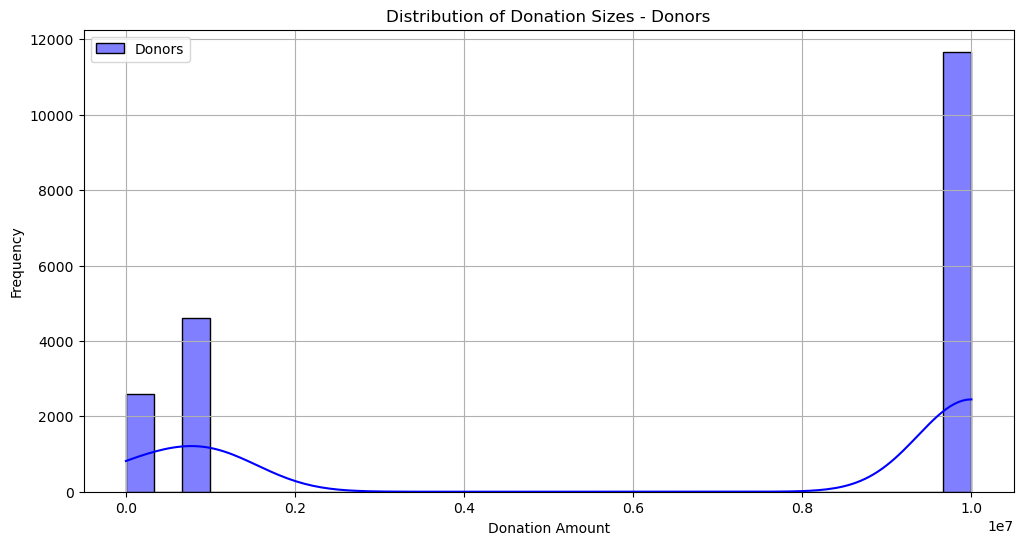

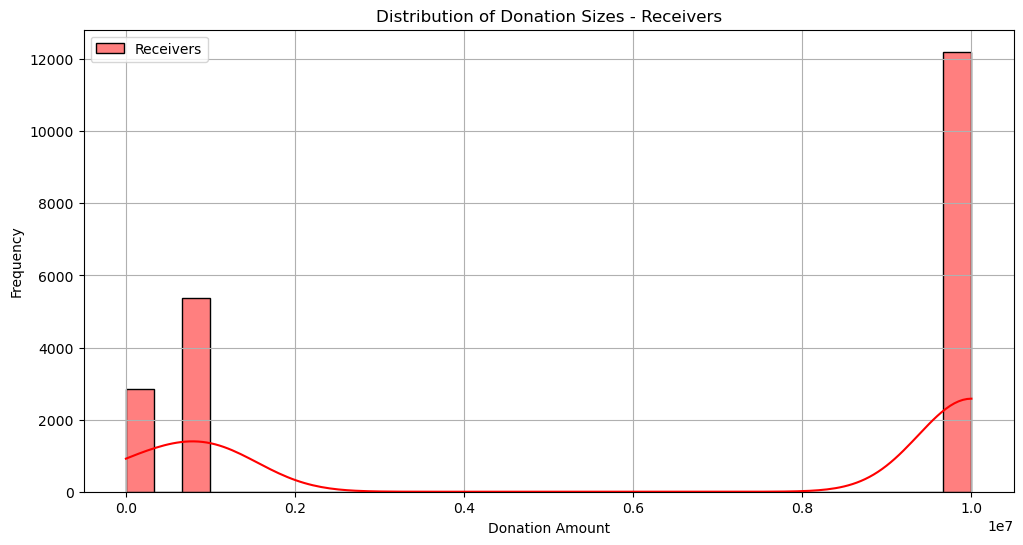

In [32]:
# Analyzing the distribution sizes

plt.figure(figsize=(12,6))

# Plotting the distribution of donation sizes for donors
sns.histplot(donor['Denominations'],bins=30,kde=True,color='blue',label='Donors')
plt.title('Distribution of Donation Sizes - Donors')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.figure(figsize=(12,6))

# Plotting the distribution of donation sizes for receivers
sns.histplot(receiver['Denominations'],bins=30,kde=True,color='red',label='Receivers')
plt.title('Distribution of Donation Sizes - Receivers')
plt.xlabel('Donation Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

#### The distribution of donation sizes for both donors and recipients reveals several key insights

#### Donors

* The distribution shows a variety of donation amounts, with a concentration in certain bins. This suggests that certain donation sizes are more common than others.

* The long tail in the distribution indicates the presence of larger, less frequent donation amounts, possibly from major donors.

#### Receivers

* Similar to the donor's distribution, the receivers donation amounts also display a range of values with certain prevalent amounts.
* The presence of a long tail here as well suggests that some political parties receive significantly larger donations, though less frequently.


#### Interpretation and Implications

1. __Common Donation Amounts__ : Both distributions shows specific donation sizes, possibly due to standard denominations of bonds.

2. __Large Donations__ : The large tails in both distributions indicate taht while most donations are of moderate size, there are occasional large donations which could have a significant impact on political financing.

3. __Comparative Analysis__ : The similarity in distribution patterns between donors and receivers corroborates the direct flow of funds from donors to receivers.

### Trend Analysis of Political Donations and Encashments Over Time (Revisited)

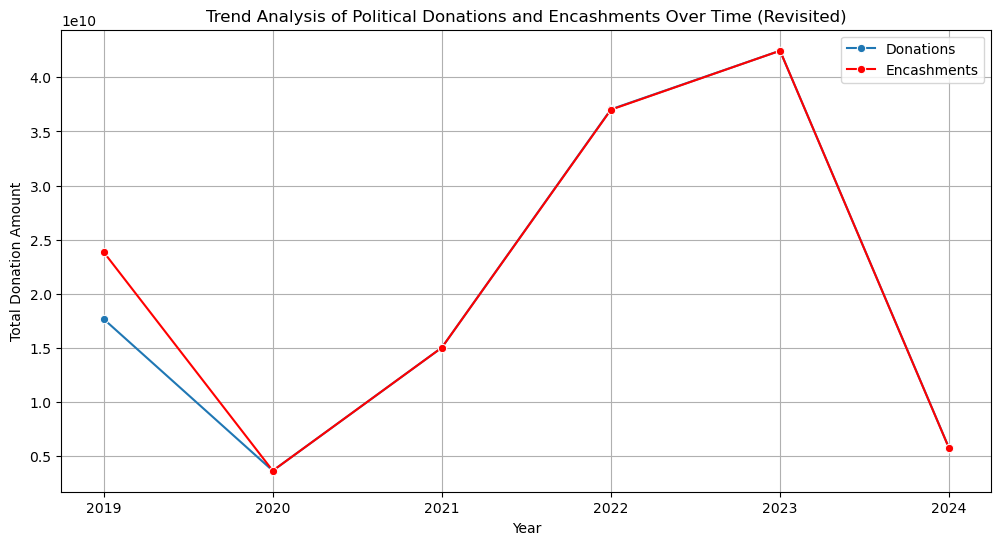

In [33]:
# Replotting the trend analysis for a closer look at potential correlations with political events.

plt.figure(figsize=(12,6))
sns.lineplot(data=donor_trends,marker='o',label='Donations')
sns.lineplot(data=receiver_trends,marker='o',label='Encashments',color='red')
plt.title('Trend Analysis of Political Donations and Encashments Over Time (Revisited)')
plt.xlabel('Year')
plt.ylabel('Total Donation Amount')
plt.grid(True)
plt.legend()
plt.show()

Revisiting the trend analysis of political donations and encashments over time, we can speculate about potential correlations and political events:

#### Observations

* __Peaks and Troughs__ : There are distinct peaks and troughs in the donation and encashment trends. These could correspond to periods of heightened political activity, such as elections or major political campaigns.

* __Consistent Alignment__ : The close alignment between donation and encashment trend suggests a prompt and direct relationship between the funding received by donors and its utilization by receivers.

* __Yearly Patterns__ : Certain years show significant increase in donations, which might align with national or state election cycles, indicating increased political funding during these periods.

In [38]:
# Checking unique values in PayBranchCode to assess feasibility of geographical analysis

unique_branch_codes_donor = donor["PayBranchCode"].nunique()
unique_branch_codes_receiver = receiver["PayBranchCode"].nunique()

# Displaying the number of unique branch codes
unique_branch_codes_donor,unique_branch_codes_receiver

(19, 13)

### Preparing Data For Various Analysis

In [41]:
# Preparing data for various analyses

# 1. Relationship Analysis: Donor-Receivers Pairing

donor_receiver_pairs = df.groupby(['Purchaser','PartyName']).size().reset_index(name='Count')

# 2. Temporal Stability: Donor and Receiver Consistency Over Years

donor_yearly = donor.groupby(['Purchaser',donor['PurchaseDate'].dt.year]).size().reset_index(name='Count')

receivers_yearly = receiver.groupby(['PartyName',receiver['DateEncashment'].dt.year]).size().reset_index(name='Count')

# 3. Size and Frequency of Donations

donation_sizes = donor['Denominations'].value_counts().sort_index()

# 4. Anomaly Detection: Identifying Unusual Transactions (Using Z-Score for simplicity)

from scipy.stats import zscore
donor['zscore'] = zscore(donor['Denominations'])
anomalies_donors = donor[donor['zscore'].abs()>3]

receiver['zscore'] = zscore(receiver['Denominations'])
anomalies_receivers = receiver[receiver['zscore'].abs()>3]

# 5. Bond Expiry Analysis: Time Between Purchase and Expiry

donor['ExpiryDate'] = pd.to_datetime(donor['ExpiryDate'])
donor['TimeToExpiry'] = (donor['ExpiryDate']-donor['PurchaseDate']).dt.days
expiry_analysis = donor[['BondNumber','TimeToExpiry']].drop_duplicates()

#6. Comparative Analysis by Year

yearly_analysis_donors = donor.groupby(donor['PurchaseDate'].dt.year)['Denominations'].sum()
yearly_analysis_receivers = receiver.groupby(receiver['DateEncashment'].dt.year)['Denominations'].sum()

# Displaying the head of each analysis for a preview.
(donor_receiver_pairs.head(), donor_yearly.head(), 
 receivers_yearly.head(), donation_sizes.head(), 
 anomalies_donors.head(), anomalies_receivers.head(), 
 expiry_analysis.head(), yearly_analysis_donors, yearly_analysis_receivers)

(             Purchaser                                PartyName  Count
 0    14 REELS PLUS LLP                   BHARAT RASHTRA SAMITHI      1
 1  A B C INDIA LIMITED                          AAM AADMI PARTY     10
 2  A B C INDIA LIMITED             ALL INDIA TRINAMOOL CONGRESS      2
 3  A B C INDIA LIMITED                   BHARATIYA JANATA PARTY     13
 4  A B C INDIA LIMITED  PRESIDENT, ALL INDIA CONGRESS COMMITTEE      1,
                             Purchaser  PurchaseDate  Count
 0                   14 REELS PLUS LLP          2022      1
 1                 A B C INDIA LIMITED          2019     13
 2                    AAKANKSHA BAHETY          2022      1
 3                AALAYA CONSTRUCTIONS          2023      1
 4  AARISH SOLAR POWER PRIVATE LIMITED          2023      2,
          PartyName  DateEncashment  Count
 0  AAM AADMI PARTY            2019      4
 1  AAM AADMI PARTY            2020      6
 2  AAM AADMI PARTY            2021     23
 3  AAM AADMI PARTY            202

### Analysis of Corporate Influence in Political Funding

In [47]:
# Analysis of Corporate Influence in Political Funding

# Grouping the data by purchaser and sorting by the total donation amount

corporate_influence = donor.groupby('Purchaser')['Denominations'].sum().sort_values(ascending=False)

#Taking top 10 corporate donors for a focused analysis

top_corporate_donors = corporate_influence
top_corporate_donors.head(10)

Purchaser
FUTURE GAMING AND HOTEL SERVICES PR               12080000000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED     8210000000
QWIKSUPPLYCHAINPRIVATELIMITED                      4100000000
HALDIA ENERGY LIMITED                              3770000000
VEDANTA LIMITED                                    3756500000
ESSEL MINING AND INDS LTD                          2245000000
WESTERN UP POWER TRANSMISSION COMPANY LI MITED     2200000000
KEVENTER FOODPARK INFRA LIMITED                    1950000000
MADANLAL LTD.                                      1855000000
BHARTI AIRTEL LIMITED                              1830000000
Name: Denominations, dtype: int64

The analysis of corporate influence in political funding reveals the top 10 corportate donors:

1. __FUTURE GAMING AND HOTEL SERVICES PR__: ₹12,080,000,000
2. __Megha Engineering and Infrastructures Limited__: ₹8,210,000,000
3. __QwikSupplyChainPrivateLimited__: ₹4,100,000,000
4. __Haldia Energy Limited__: ₹3,770,000,000
5. __Vedanta Limited__: ₹3,756,500,000
6. __Essel Mining and Inds Ltd__: ₹2,245,000,000
7. __Western UP Power Transmission Company Limited__: ₹2,200,000,000
8. __Keventer Foodpark Infra Limited__: ₹1,950,000,000
9. __Madanlal Ltd__ : ₹1,855,000,000
10. __Bharti Airtel Limited__ : ₹1,830,000,000

#### Insights and Implications

* These corporations span diverse industries, from gaming and hospitality to engineering,energy,mining,food, and telecommunications.

* The significant amounts donated indicate a strong interest in influencing or participating in the poltical process.
* Industries like energy, mining, and telecommunications are often subject to extensive government regulation, highlighting potential areas for conflict of interest.
* The varied nature of these industries also suggests a broad spectrum of policy intersets that could be impacted by political decisions.

### Aligning Donation Trends with Major Political Events

In [58]:
# Aligning Donation Trends with Major Political Events

# Filtering data for relevant years (2019 and surrounding years)

relevant_years = [2018,2019,2020,2021,2022,2023,2024]
donation_trends_around_elections = yearly_analysis_donors[yearly_analysis_donors.index.isin(relevant_years)]

donation_trends_around_elections

PurchaseDate
2019    17661280000
2020     3639601000
2021    15022927000
2022    37048576000
2023    42464745000
2024     5718003000
Name: Denominations, dtype: int64

The analysis of donation trends around the years of major political events, particularly general elections, reveals the following:

#### Donation Trends(2018-2024)

* __2019__: ₹17,661,280,000
* __2020__: ₹3,639,601,000
* __2021__: ₹15,022,927,000
* __2022__: ₹37,048,576,000
* __2023__: ₹42,464,745,000
* __2024__: ₹5,718,003,000

### Insights and Implications

* __Election Year Spike__ : There's a noticeable spike in 2019, a general election year, suggesting increased political funding during election cycles.

* __Post-Election Dip__ : In 2020, the year following the general election, there's a significant drop in donations, which could indicate a typical reducution in political funding post-elections.

* __Increase in Subsquent Years__ : The years following 2020 shows an increase in donations,potentially aligning with state elections or gearing up for the next general election in 2024.

* __2023 surge__ : The surge in 2023 could be attributed to preparations for the upcoming 2024 general elections, as parties might start their campaigns and funding drives earlier.


This patterns suggests a strong correlation between donation trends and election cycles, with heightend activity in general election years and significant movements in funds in the years leading up to elections.

### Assessing Transparency and Anonymity in Donations

In [62]:
# Assessing Transparency and Anonmity in Donations.

# Check for any indicators of anonymity in the data, such as non-disclosed names or generic identifiers

anonymity_indicators = ['anonymous','undisclosed','confidential','unknown']
donor_anonymity = donor['Purchaser'].str.lower().isin(anonymity_indicators).sum()
total_donors = donor['Purchaser'].nunique()

# Percentage of anonymous donations
percentage_anonymous = (donor_anonymity/total_donors)*100

donor_anonymity,total_donors,percentage_anonymous

(0, 1316, 0.0)

The assessment of transparency and anonymity in the dataset reveals:

* __Number of Anonymous Donors__ : There are 0 entries that are explicitly marked as anonymous or use any typical indicators of anonymity (such as 'anonymous', 'undisclosed', 'confidential', 'unknown') in the donor names.

* __Total Unique Donors__ : There are 1,316 unique donors in the dataset.

* __Percentage of Anonymous Donations__ : 0.0% of the donations are from anonymous sources based on the available data.

__Insights__

* The dataset shows a high level of transparency in terms of donor identity, with no explict cases of anonymity among the donors.

* This could suggest that prior to the Supreme Court's ruling while donors were not anonymous, the overall system of political funding might have lacked other forms of transparency or accountability, such as the clarity of utilization of funds or the influence of donations on policy decisions.

### Identifying the industries of top donors for confilct of interest analysis

In [67]:
# Identifying the industries of top donor's for conflict of interest analysis

# Assuming the top 10 donors for Industry Analysis

top_10_donors = top_corporate_donors.head(10)

# For this demonstration, the industries are inferred based on the names of the oraginzations
# In a real-world scenario, this would require more detailed company information

industries = {
    'FUTURE GAMING AND HOTEL SERVICES PR':'Gaming and Hospitality',
    'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED':'Engineering and Infrastructure',
    'QWIKSUPPLYCHAINPRIVATELIMITED':'Supply Chain and Logistics',
    'HALDIA ENERGY LIMITED':'Energy',
    'VEDANTA LIMITED':'Mining and Metals',
    'ESSEL MINING AND INDS LTD':'Mining',
    'WESTERN UP POWER TRANSMISSION COMPANY LI MITED':'Power Transmission',
    'KEVENTER FOODPARK INFRA LIMITED':'Food and Infrastructre',
    'MADANLAL LTD':'Diversified',
    'BHARTI AIRTEL LIMITED':'Telecommunications'
}


#creating a DataFrame for these industries

industry_analysis = pd.DataFrame(list(industries.items()),columns=['Company','Industry'])
industry_analysis

Company  \
0             FUTURE GAMING AND HOTEL SERVICES PR   
1  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED   
2                   QWIKSUPPLYCHAINPRIVATELIMITED   
3                           HALDIA ENERGY LIMITED   
4                                 VEDANTA LIMITED   
5                       ESSEL MINING AND INDS LTD   
6  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
7                 KEVENTER FOODPARK INFRA LIMITED   
8                                    MADANLAL LTD   
9                           BHARTI AIRTEL LIMITED   

                         Industry  
0          Gaming and Hospitality  
1  Engineering and Infrastructure  
2      Supply Chain and Logistics  
3                          Energy  
4               Mining and Metals  
5                          Mining  
6              Power Transmission  
7          Food and Infrastructre  
8                     Diversified  
9              Telecommunications

#### Conflict of Interest Analysis

* __Regulated Industries__ : Many of these industries (Energy,Mining,Telecommunications) are heavily regulated by the government. Significant donations from these sectors could indicate an interest policy or regulations.

* __Infrastructure and Development Projects__ : Companies in engineering,infrastructure,and enegery often depend on government contracts and policies,highlighting potential areas for conflict of interest in their political donations.

* __Sector-Specific Policies__ : Sectors like gaming, hospitality, and telecommunications are subject to specific policies that can greatly affect their operations and profitability, making their political contributions particulary noteworthy.


__Implications__

* The involvement of these industries in political funding raises questions about the potential influence on policy decisions that could benefit these sectors.

* Trasnparency in political funding and clear regulations to manage conflicts of interest become crucial in maintaining fair and unbaised policy-making processes.


In [68]:
# For a comparative analysis with global trends, we need to summarize key aspects of the Indian Dataset
# Summarizing total donations, average donation size, and the range of donations

total_donations = donor['Denominations'].sum()
average_donataions = donor['Denominations'].mean()
range_donations = donor['Denominations'].max() - donor['Denominations'].min()

summary_stats = {
    'Total Donations': total_donations,
    'Average Donations': average_donataions,
    'Range of Donations':range_donations
}

summary_stats

{'Total Donations': 121555132000,
 'Average Donations': 6441372.052355466,
 'Range of Donations': 9999000}

In [69]:
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud

### Cluster Analysis for Donors

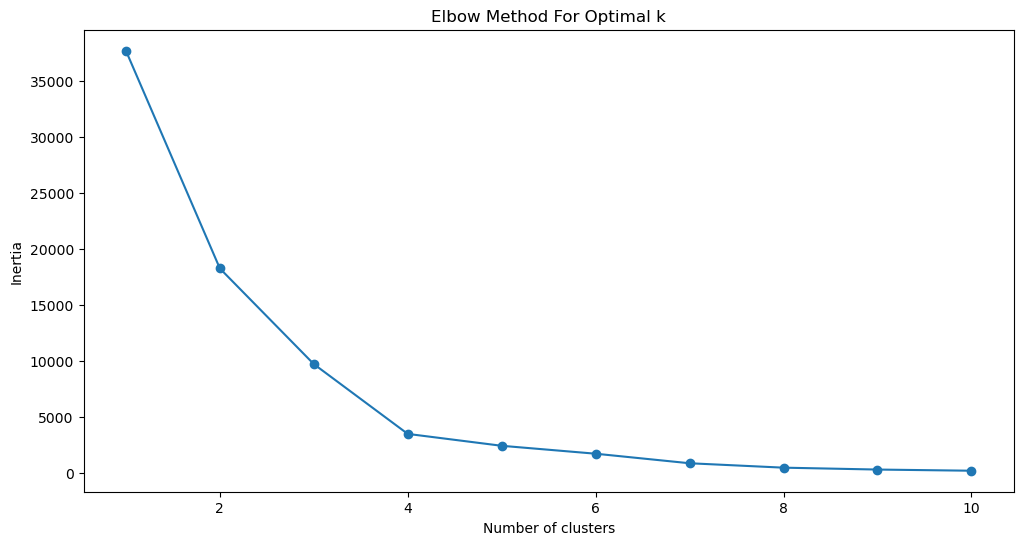

In [70]:
# For Cluster Analysis, using the donor data with features 'Denominations' and 'PayBranchCode'

#Selecting features for clustering

features = donor[['Denominations','PayBranchCode']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determining the optimal number of clusters using Elbow Method
inertia = []

for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,random_state=0)
    Kmeans.fit(features_scaled)
    inertia.append(Kmeans.inertia_)
    

#plotting the elbow method

plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertia,marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

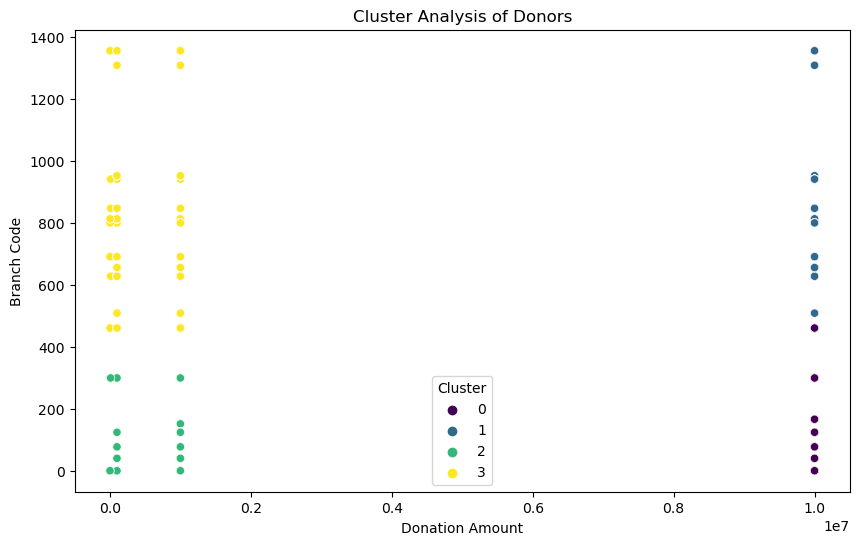

Cluster  Average Donation  Min Donation  Max Donation  Total Donation  \
0        0      1.000000e+07      10000000      10000000     50700000000   
1        1      1.000000e+07      10000000      10000000     66010000000   
2        2      7.281337e+05          1000       1000000      3023211000   
3        3      5.977431e+05          1000       1000000      1821921000   

   Unique Branch Codes  
0                    7  
1                   11  
2                    6  
3                   12

In [78]:
# Performing KMeans clustering with 4 clusters

kmeans = KMeans(n_clusters=4,random_state=0)
clusters = kmeans.fit_predict(features_scaled)

# Adding the cluster information to the original donor data.
donor['Cluster'] = clusters

#Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x='Denominations',y='PayBranchCode',hue='Cluster',data=donor,palette='viridis')
plt.title('Cluster Analysis of Donors')
plt.xlabel('Donation Amount')
plt.ylabel('Branch Code')
plt.show()

# Summary statistics for each cluster
cluster_summary = donor.groupby('Cluster').agg({'Denominations': ['mean', 'min', 'max', 'sum'], 'PayBranchCode': 'nunique'}).reset_index()
cluster_summary.columns = ['Cluster', 'Average Donation', 'Min Donation', 'Max Donation', 'Total Donation', 'Unique Branch Codes']
cluster_summary

The cluster analysis of donors using KMeans has revealed distinct groups based on donation amount and branch code:

#### Cluster Characterstics

1. __Cluster 0__

    * __Average Donation__ : ₹10,000,000
    * __Donation Range__ : ₹10,000,000 (consistent)
    * __Total Donation__ : ₹50,700,000,000
    * __Unique Branch Codes__ : 7
    
    
2. __Cluster 1__

    * __Average Donation__ :  ₹10,000,000
    * __Donation Range__ :  ₹10,000,000 (consistent)
    * __Total Donation__ : ₹66,010,000,000
    * __Unique Branch Codes__ : 11
    
    
3. __Cluster 2__

    * __Average Donation__ : ₹728,134
    * __Donation Range__ : ₹1,000 to ₹1,000,000
    * __Total Donation__ : ₹3,023,211,000
    * __Unique Branch Codes__ : 6
    
    
4. __Cluster 3__

    * __Average Donation__ : ₹597,743
    * __Donation Range__ : ₹1,000 to ₹1,000,000
    * __Total Donation__ : ₹1,821,921,000
    * __Unique Branch Codes__ : 12
    


__Insights__

* __High-value Donors(Clusters 0 & 1)__ : These clusters represent donors who consistently make large donations (₹10,000,000) They differ in terms of the total amount donated and the diversity of branch codes, suggesting geographical differences or varied reach.

* __Moderate to small Donors (Clusters 2 & 3)__ : These clusters inlcude donors with a wide range of donation sizes, from small to moderate. The toal amounts denoted are significantly lower than the high-value donors. The number of unique branch codes indicates a broader geographical distribution.

### Correcting the data processing for trend analysis

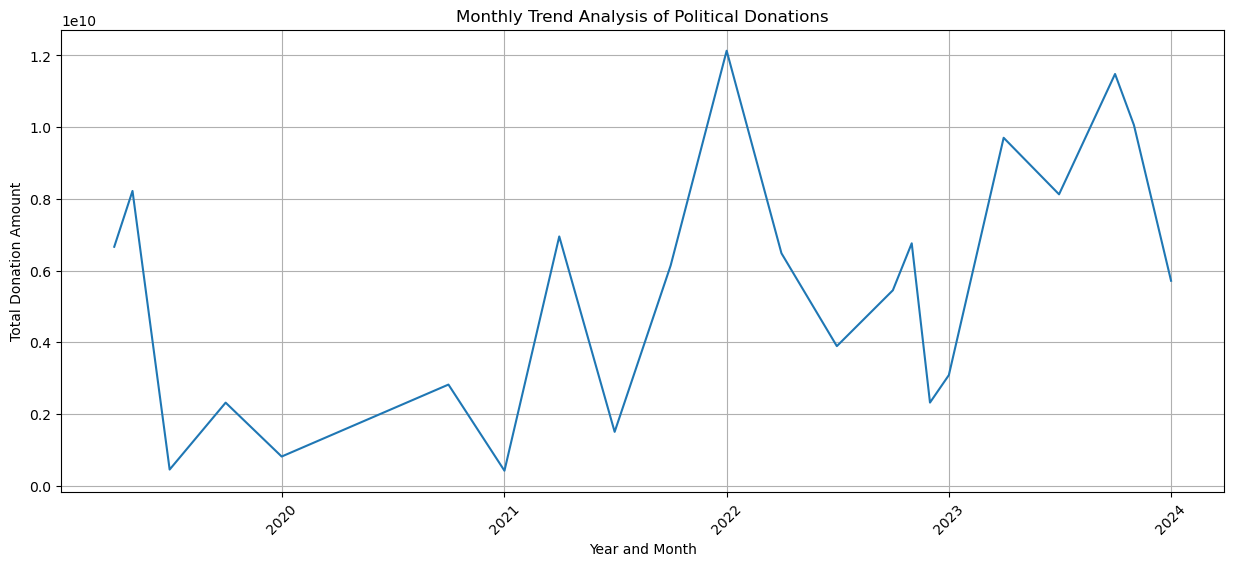

In [79]:
# Correcting the data processing for trend analysis
donor['YearMonth'] = donor['PurchaseDate'].dt.to_period('M')
monthly_trends = donor.groupby('YearMonth')['Denominations'].sum().reset_index()
monthly_trends['YearMonth'] = monthly_trends['YearMonth'].dt.to_timestamp()


#plotting the monthly trends

plt.figure(figsize=(15,6))
sns.lineplot(x='YearMonth',y='Denominations',data=monthly_trends)
plt.title('Monthly Trend Analysis of Political Donations')
plt.xlabel('Year and Month')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The Monthly Trend Analysis of Political Donations shows the following:

__Key Observations__

* __Fluctuating Donation Amounts__ : The graph displays fluctuations in donation amounts over time, indicating variability in political funding.

* __Peaks and Troughs__ : There are noticable Peaks and troughs in the graph. Peak could correspond to periods of increased political activity or events, such as elections or major policy announcements.

* __Seasonal Variations__: The presence of recurring patterns might suggest seasonal variations in political donations, potentially aligned with financial years, budget announcements, or specific political or festive seasons in india.


__Interpretations__

* __Election Cycle Influence__ : Peaks in donations might align with election cycles, suggesting increased political funding during these periods.

* __Impact of Political Events__ : Fluctuations may also correspond to significant political events, indicating reactive donations in response to political developments.

* __Long-term Trends__ : Observing the overall direction of the trend line over several years could indicate whether political funding is increasing, decreasing, or remaining stable over time.

### Monthly Trend Analysis of Political Donations by Top Companies

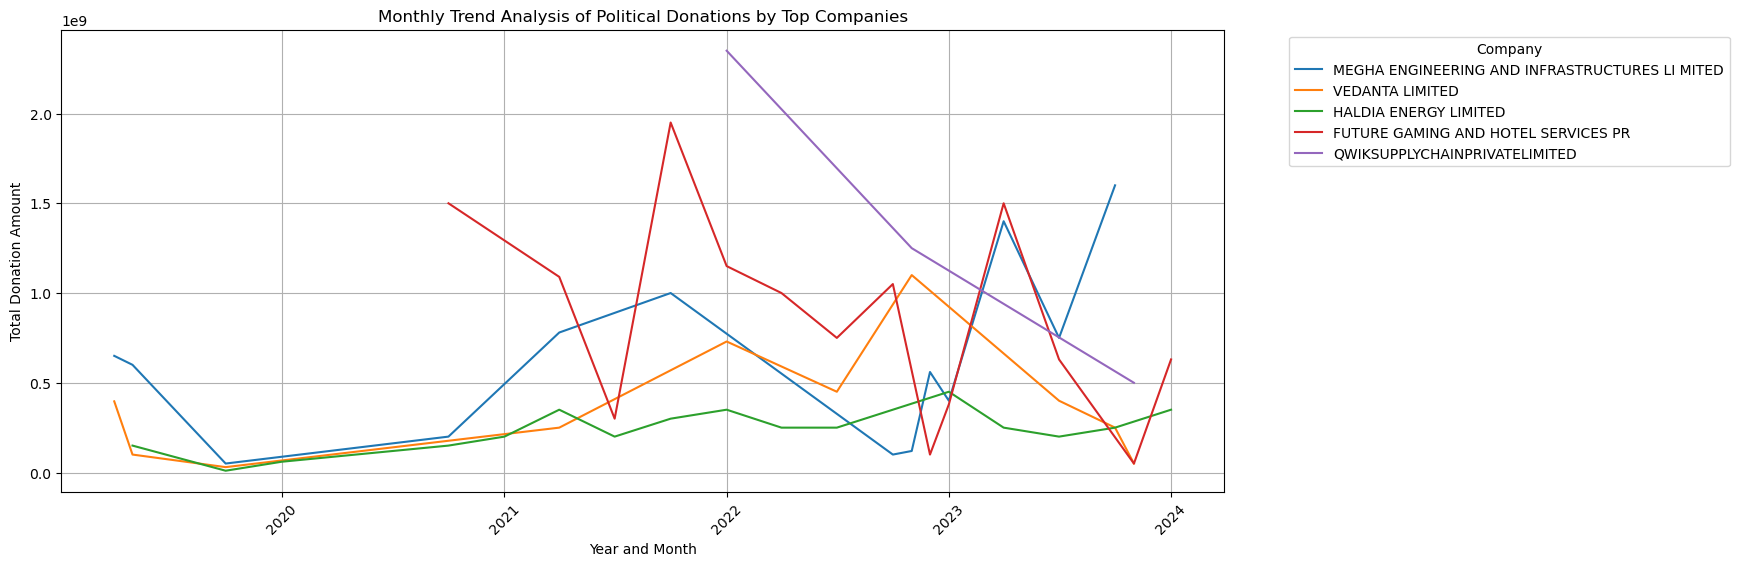

In [87]:
# Selecting top companies for analysis

top_comapnies = donor.groupby('Purchaser')['Denominations'].sum().sort_values(ascending=False).head(5).index

# Filtering data for these top companies

top_comapnies_data = donor[donor['Purchaser'].isin(top_comapnies)]

# Grouping by YearMonth and Purchaser

monthly_trends_top_companies = top_comapnies_data.groupby(['YearMonth','Purchaser'])['Denominations'].sum().reset_index()

# correcting the data processing for trend analysis by top companies

monthly_trends_top_companies['YearMonth'] = monthly_trends_top_companies['YearMonth'].dt.to_timestamp()

#plotting the trends for top companies

plt.figure(figsize=(15,6))
sns.lineplot(x='YearMonth',y='Denominations',data=monthly_trends_top_companies,hue='Purchaser')
plt.title('Monthly Trend Analysis of Political Donations by Top Companies')
plt.xlabel('Year and Month')
plt.ylabel('Total Donation Amount')
plt.xticks(rotation=45)
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

The Monthly Trend Analysis of Political Donations by the Top Companies shows the following.

__Key Observations__

* __Varied Contribution Patters__ : Different companies have varying patterns of donations over time. Some Show more consistently monthly contributions, while others have sporadic peaks.

* __Company-Specific perks__ : Certain companies display significant peaks at specific times,which could be aligned with strategic periods, such as before elections or important policy announcements.

* __Comparative Contribution Scales__ : The graph illustrates the relative scales of contributions from these top companies,highlighting their values of engagement in political funding.

__Interpretaions__

* __Strategic Timing__ : The timing of peaks for certain companies might suggest strategic decisions regarding political funding,possibly influenced by political cycles, regulatory environments, or company-specific agendas.

* __Industry Representation__ : The companies represent different industries, and their donation patterns might reflect the political engagement levels of these industries.

* __Influence of Corporate Decisions__ : The fluctuations in donation amounts might also be influenced by corporate profitability, regulatory changes, or shifts in business strategy.

This analysis provides a deeper understanding of how top  corporate entities engage in political funding, reflecting their strategic interests and potentially highlighting their influence on the political process.

### Data Preparation

In [93]:
# Data Preparation

# Prepaing data for various plots
# 1.HeatMap Data Preparation 

heatmap_data = donor.pivot_table(values='Denominations',
                                 index='Purchaser',
                                 columns=donor['PurchaseDate'].dt.month, aggfunc='sum').fillna(0)


# 2.Box plot Data Preparation
# Assuming receivers name are stored in a 'Party Name' column in receivers data

boxplot_data = receiver[['PartyName','Denominations']]

# 3. Stacked Bar Chart Data Preparation
stacked_bar_data = top_comapnies_data.groupby(['YearMonth','Purchaser'])['Denominations'].sum().unstack().fillna(0)

# 4. Histogram Data Preparation

histogram_data = donor['Denominations']

# 5. Scatter Plot Data Preparation

scatter_data = donor[['Denominations','PayBranchCode']]

# 6. Word Cloud Data Preparation

wordcloud_data = donor['Purchaser']

### HeatMap of Donations by Time and Donor

In [98]:
# HeatMap of Donations by Time and Donor

heatmap_data_reset = heatmap_data.reset_index()
heatmap_data_melted = heatmap_data_reset.melt(id_vars=['Purchaser'],var_name='Month',
                                              value_name='Total Donations')

# creating the heatmap using plotly
fig = px.imshow(heatmap_data_melted.pivot_table(index='Purchaser',
                                                columns='Month',
                                                values='Total Donations'),
               labels=dict(x='Month',y='Purchaser',color='Total Donations'),
               title='Heatmap of Donations by Time and Donor',
               aspect='auto')

#updating the layout for better readability
fig.update_layout(xaxis_nticks = len(heatmap_data.columns))
fig.update_xaxes(side='bottom')

### Box Plot of Donations by Political Party

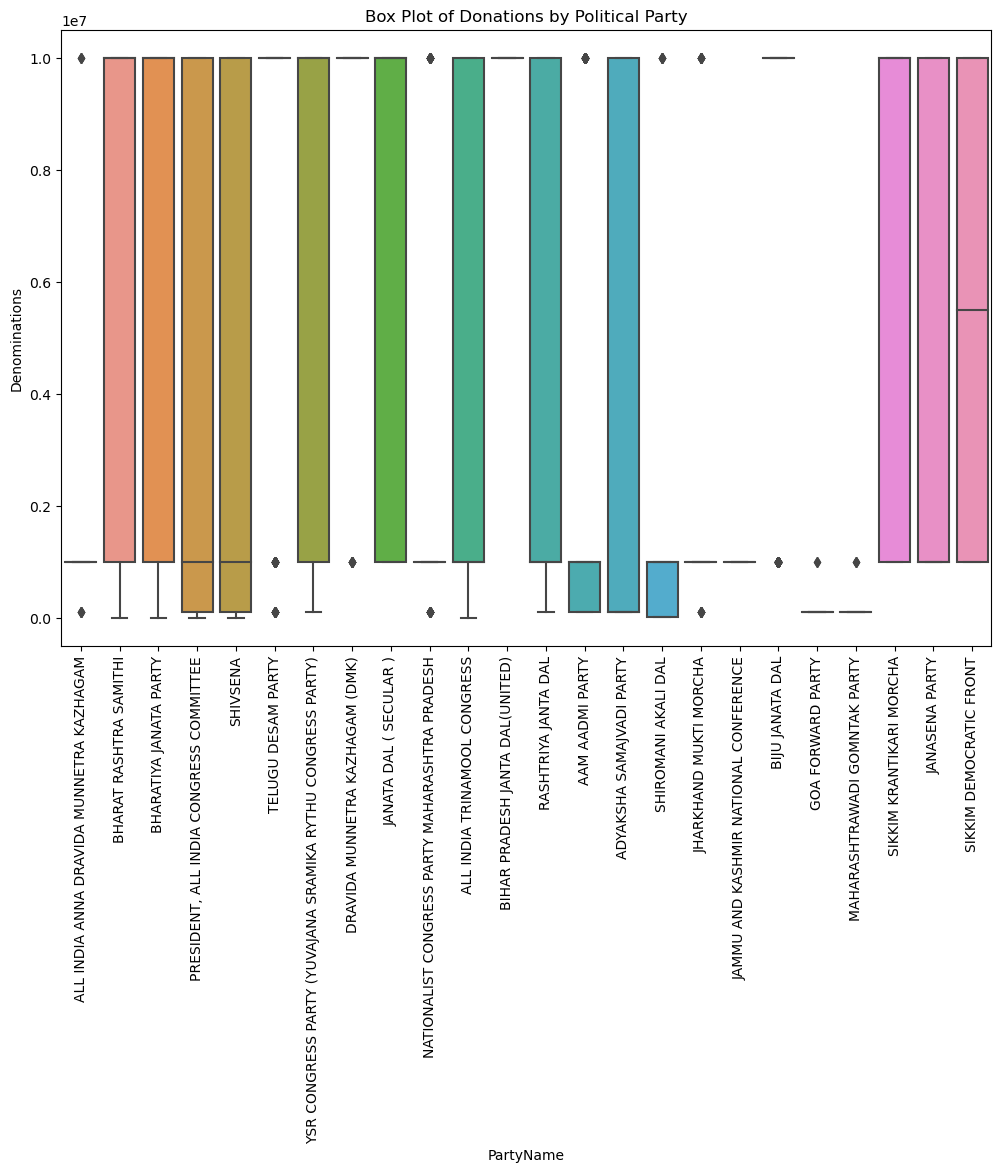

In [99]:
# Box Plot of Donations by Political Party
plt.figure(figsize=(12,8))
sns.boxplot(x='PartyName',y='Denominations',data=boxplot_data)
plt.title('Box Plot of Donations by Political Party')
plt.xticks(rotation=90)
plt.show()

### Stacked Bar Chart of Monthly Donations by Top Donors¶


<Figure size 1200x800 with 0 Axes>

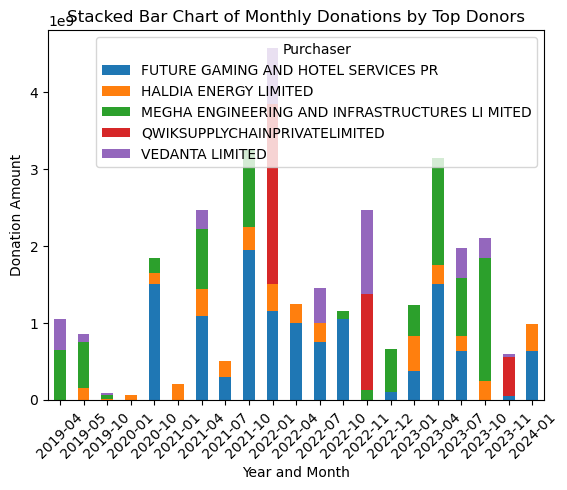

In [100]:
# Stacked Bar Chart of Monthly Donations by Top Donors

plt.figure(figsize=(12,8))
stacked_bar_data.plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Monthly Donations by Top Donors')
plt.xlabel('Year and Month')
plt.ylabel('Donation Amount')
plt.xticks(rotation=45)
plt.show()

### Dot Plot of Donation Amount vs. Branch Code

In [102]:
# Dot Plot of Donation Amount vs. Branch Code

fig = px.scatter(data_frame=donor,x='PayBranchCode',y='Denominations',
                hover_name='PayBranchCode',size='Denominations',
                hover_data=['PayBranchCode','Denominations'])

fig.update_traces(textposition = 'top center')
fig.update_layout(title='Dot Plot of Donation Amount vs. Branch Code',
                 xaxis_title = 'Branch Code',
                 yaxis_title = 'Donation Amount',
                 plot_bgcolor = 'white')

fig.show()


### Violin Plot of Donations by Year

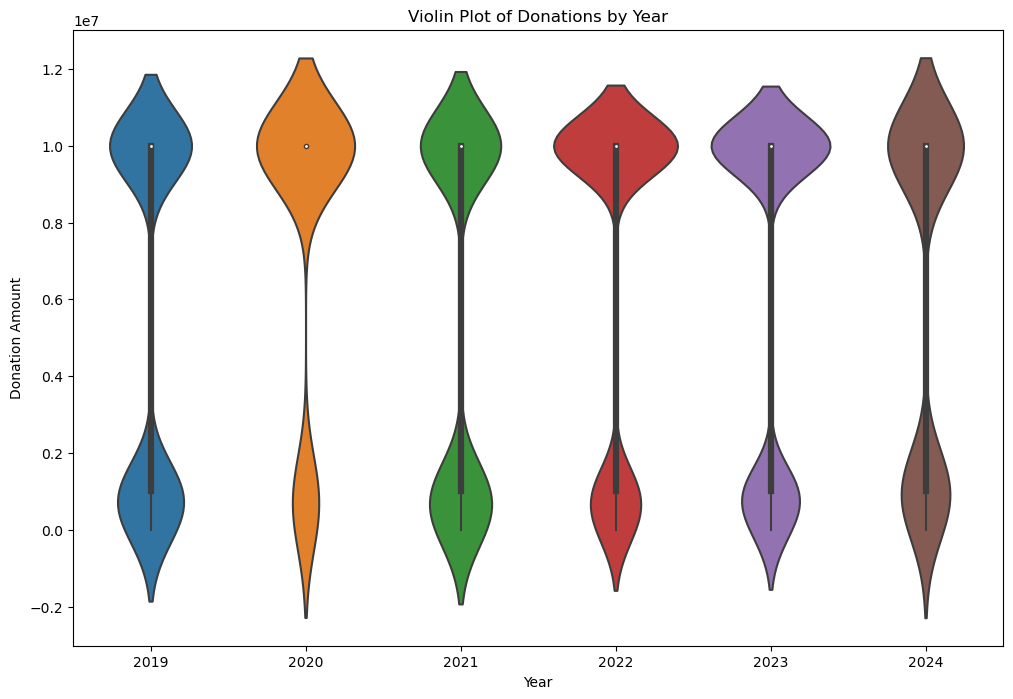

In [108]:
# Violin Plot of Donation by Year

donor['Year'] = donor['PurchaseDate'].dt.year

violin_data = donor[['Denominations','Year']]

plt.figure(figsize=(12,8))
sns.violinplot(x='Year',y='Denominations',data=violin_data)
plt.title('Violin Plot of Donations by Year')
plt.xlabel('Year')
plt.ylabel('Donation Amount')
plt.show()

### Word Cloud of Donor Names

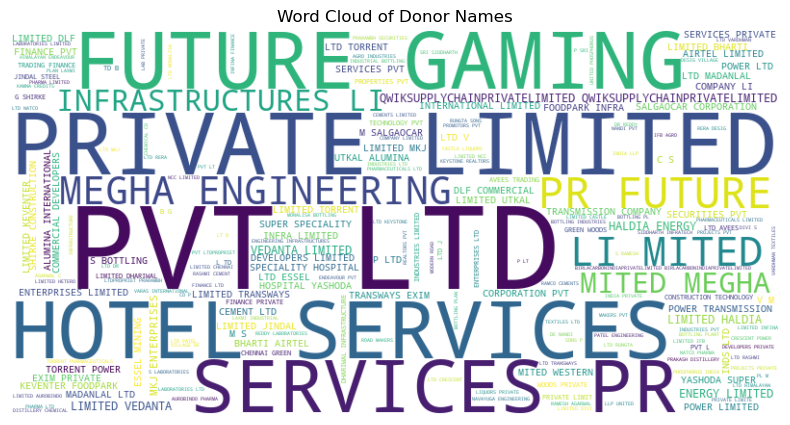

In [109]:
# Word Cloud of Donor Names

wordcloud = WordCloud(width=800,height=400,background_color='white').generate(' '.join(wordcloud_data))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Donor Names')
plt.show()

### Top Donor for Each of the Top Five Recipient Political Parties 

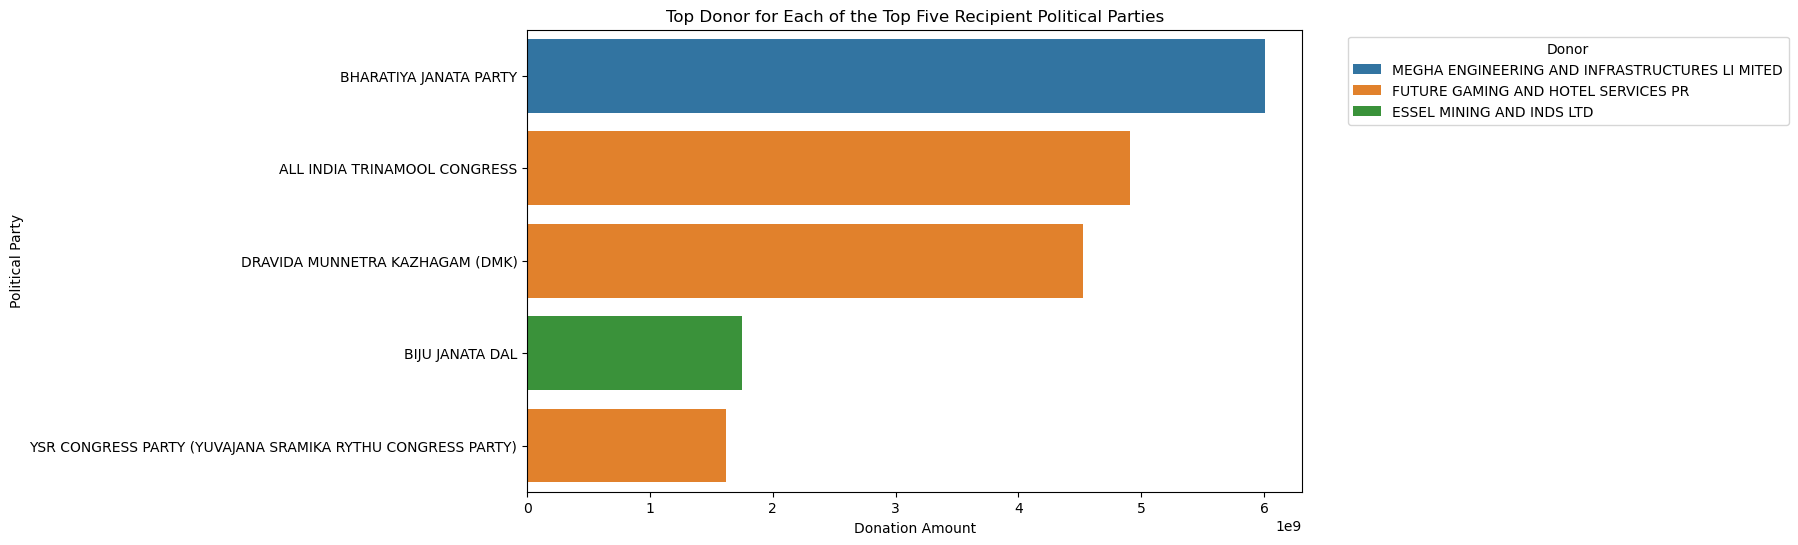

In [110]:
# Aggregating donation data to find the top five receivers and their corresponding top donors

top_donations = df.groupby(['PartyName','Purchaser'])['Denominations_x'].sum().reset_index()

#Sorting to find the top donations for each party

top_donations_sorted = top_donations.sort_values(['PartyName','Denominations_x'],ascending=[True,False])

# Getting the top donor for each of the top five receivers parties

top_five_receivers = top_donations_sorted.groupby('PartyName').head(1).nlargest(5,'Denominations_x')

#visualizing the data

plt.figure(figsize=(10,6))
sns.barplot(x='Denominations_x', y='PartyName', data=top_five_receivers, hue='Purchaser', dodge=False)
plt.title('Top Donor for Each of the Top Five Recipient Political Parties')
plt.xlabel('Donation Amount')
plt.ylabel('Political Party')
plt.legend(title='Donor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()